<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_AI-Model-Operations-MLOps/blob/main/week09_Chavrusa_04/Langchain_rag_geminiAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build a RAG agent with LangChain**
https://docs.langchain.com/oss/python/langchain/rag

In [1]:
pip install langchain langchain-text-splitters langchain-community bs4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [2]:
pip install -U "langchain[google-genai]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.0.7
    Uninstalling langchain-core-1.0.7:
      Successfully uninstalled langchain-core-1.0.7
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
  Attempting uninstall: langchain
    Found existing installation: langchain 1.0.8
    Uninstalling langchain-1.0.8:
      Successfully uninstalled langchain-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

In [3]:
from google.colab import userdata
GOOGLE_API_KEY= userdata.get('gemini-key')

In [4]:
import os
from langchain.chat_models import init_chat_model

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

model = init_chat_model("google_genai:gemini-2.5-flash-lite")

In [5]:
model

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, model='models/gemini-2.5-flash-lite', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7ee0de2b8740>, default_metadata=(), model_kwargs={})

In [6]:
pip install -qU langchain-google-genai

In [7]:
import getpass
import os

# if not os.environ.get("GOOGLE_API_KEY"):
#     os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")

In [8]:
embeddings

GoogleGenerativeAIEmbeddings(client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7ee0deba8050>, async_client=None, model='models/gemini-embedding-001', task_type=None, google_api_key=SecretStr('**********'), credentials=None, client_options=None, base_url=None, transport=None, request_options=None)

In [9]:
pip install -U "langchain-core"

In [10]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)

In [11]:
vector_store

# 1. Indexing
<img src='https://mintcdn.com/langchain-5e9cc07a/I6RpA28iE233vhYX/images/rag_indexing.png?w=840&fit=max&auto=format&n=I6RpA28iE233vhYX&q=85&s=1838328a870c7353c42bf1cc2290a779'>

# Loading documents

In [14]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# Only keep post title, headers, and content from the full HTML.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content"))
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs={"parse_only": bs4_strainer},
)
docs = loader.load()

assert len(docs) == 1
print(f"Total characters: {len(docs[0].page_content)}")

Total characters: 43047


In [13]:
# User-Agent 설정 (내 앱 이름이나 이메일 등을 적으시면 됩니다)
# 구글에서 당신의 User-Agent 값을 그대로 입력하고 위의 코드를 재 실행하라!
os.environ["USER_AGENT"] = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36"

In [15]:
print(docs[0].page_content[:500])



      LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In


In [16]:
docs

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistake

# Splitting documents

In [26]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(docs)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 63 sub-documents.


# Storing documents

In [27]:
document_ids = vector_store.add_documents(documents=all_splits)

print(document_ids[:3])

GoogleGenerativeAIError: Error embedding content: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0 [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerUserPerProjectPerModel-FreeTier"
}
]

In [28]:
document_ids

['f613c0ed-5082-419c-9102-4fb262e5640d',
 '9d9954fa-a034-43c8-9343-7d9622c781e7',
 'b645cfe6-9fd3-49bc-8e2c-24fc732c1607',
 'c8017f2a-5224-47dc-b1af-31bf4c8a11a3',
 '8f000559-f4a3-4a7e-81b8-982e9abcae7e',
 '9b3628e8-a72b-4cfa-92b8-78234b6c7f30',
 'c6e64bfe-8264-4600-8a7d-ad39ffd404ff',
 '25169e6e-a9ec-470d-b0ba-c5e005548769',
 '292c537f-14ad-48c8-a532-c71e7e168946',
 'bd780ee4-da3f-461d-9f09-92a217672dad',
 '932b8a2f-0424-48bf-8545-33569afb94cb',
 '4f6e5413-f17f-461a-a71f-f8e9cd653930',
 '030fa1c1-0bf3-4265-9648-e4b2c00b12a2',
 'f43874b4-552c-4421-b276-fc5b9da1899f',
 'aaf741d6-532a-4bfb-8243-6455c1890035',
 '7a20d7a7-5b36-490c-91c2-df8d52a33a8c',
 '501fd6e2-3710-4904-b5f7-7858ccdac51f',
 '78eb65ed-b447-4221-9436-d51db5bacf6b',
 '4e037e99-951f-40fb-af01-ecb69b9e89c4',
 'a675fe3a-bb69-4cfd-aab1-ca99bb21e67f',
 '602fcf2c-d4ea-4d20-b05a-5ced5a556265',
 'e1b8b9bb-1249-4d37-ad01-789058d348b4',
 '51f38530-221b-43c8-aafa-830fab45fe50',
 '8864a6c6-d29d-49b8-9e39-f44487418fb7',
 '43bc42ba-ebb7-

# 2. Retrieval and Generation
<img src='https://mintcdn.com/langchain-5e9cc07a/I6RpA28iE233vhYX/images/rag_retrieval_generation.png?w=840&fit=max&auto=format&n=I6RpA28iE233vhYX&q=85&s=67fe2302e241fc24238a5df1cf56573d'>

# RAG agents

In [31]:
from langchain.tools import tool

@tool(response_format="content_and_artifact")
def retrieve_context(query: str):
    """Retrieve information to help answer a query."""
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\nContent: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

In [32]:
from langchain.agents import create_agent


tools = [retrieve_context]
# If desired, specify custom instructions
prompt = (
    "You have access to a tool that retrieves context from a blog post. "
    "Use the tool to help answer user queries."
)
agent = create_agent(model, tools, system_prompt=prompt)

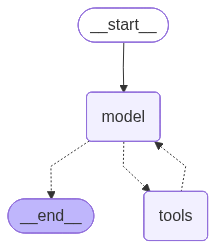

In [33]:
agent

In [34]:
query = (
    "What is the standard method for Task Decomposition?\n\n"
    "Once you get the answer, look up common extensions of that method."
)

for event in agent.stream(
    {"messages": [{"role": "user", "content": query}]},
    stream_mode="values",
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is the standard method for Task Decomposition?

Once you get the answer, look up common extensions of that method.
================================== Ai Message ==================================
Tool Calls:
  retrieve_context (396efb4c-b8f7-4b21-a5e7-ffe5e2512aa3)
 Call ID: 396efb4c-b8f7-4b21-a5e7-ffe5e2512aa3
  Args:
    query: standard method for Task Decomposition
================================= Tool Message =================================
Name: retrieve_context

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 2578}
Content: Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.
Another quite distinct approach, LLM+P (Liu et al. 2023), involves relying on a